### Baivarite Analysis

In [1]:
# hide warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# import libraries
import numpy as np
import pandas as pd
import statistics
import matplotlib.pyplot as plt
%matplotlib inline
import pylab as plt
import seaborn as sns
from scipy.stats import chi2_contingency

In [3]:
# loading data
df = pd.read_csv("cleaned_disease.csv")
df.head()

sbp  tobacco   ldl  adiposity  famhist  typea  obesity  alcohol  age  chd
0  160.0    12.00  5.73      23.11  Present   49.0    25.30    59.16   52    1
1  144.0     0.01  4.41      28.61   Absent   55.0    28.87     2.06   63    1
2  118.0     0.08  3.48      32.28  Present   52.0    29.14     3.81   46    0
3  170.0     7.50  6.41      38.03  Present   51.0    31.99    24.26   58    1
4  134.0    13.60  3.50      27.78  Present   60.0    25.99    57.34   49    1

##### 1. Impact of numerical features on target feature 

In [4]:
numerical_features = [col for col in df.columns \
                      if np.issubdtype(df[col].dtype, np.number)]

print(numerical_features)
numerical_features.pop(8)
print(numerical_features)

['sbp', 'tobacco', 'ldl', 'adiposity', 'typea', 'obesity', 'alcohol', 'age', 'chd']
['sbp', 'tobacco', 'ldl', 'adiposity', 'typea', 'obesity', 'alcohol', 'age']


In [5]:
# define categorical features
categorical_features = [col for col in df.columns \
                      if pd.api.types.is_string_dtype(df[col])]
print(categorical_features)

['famhist']


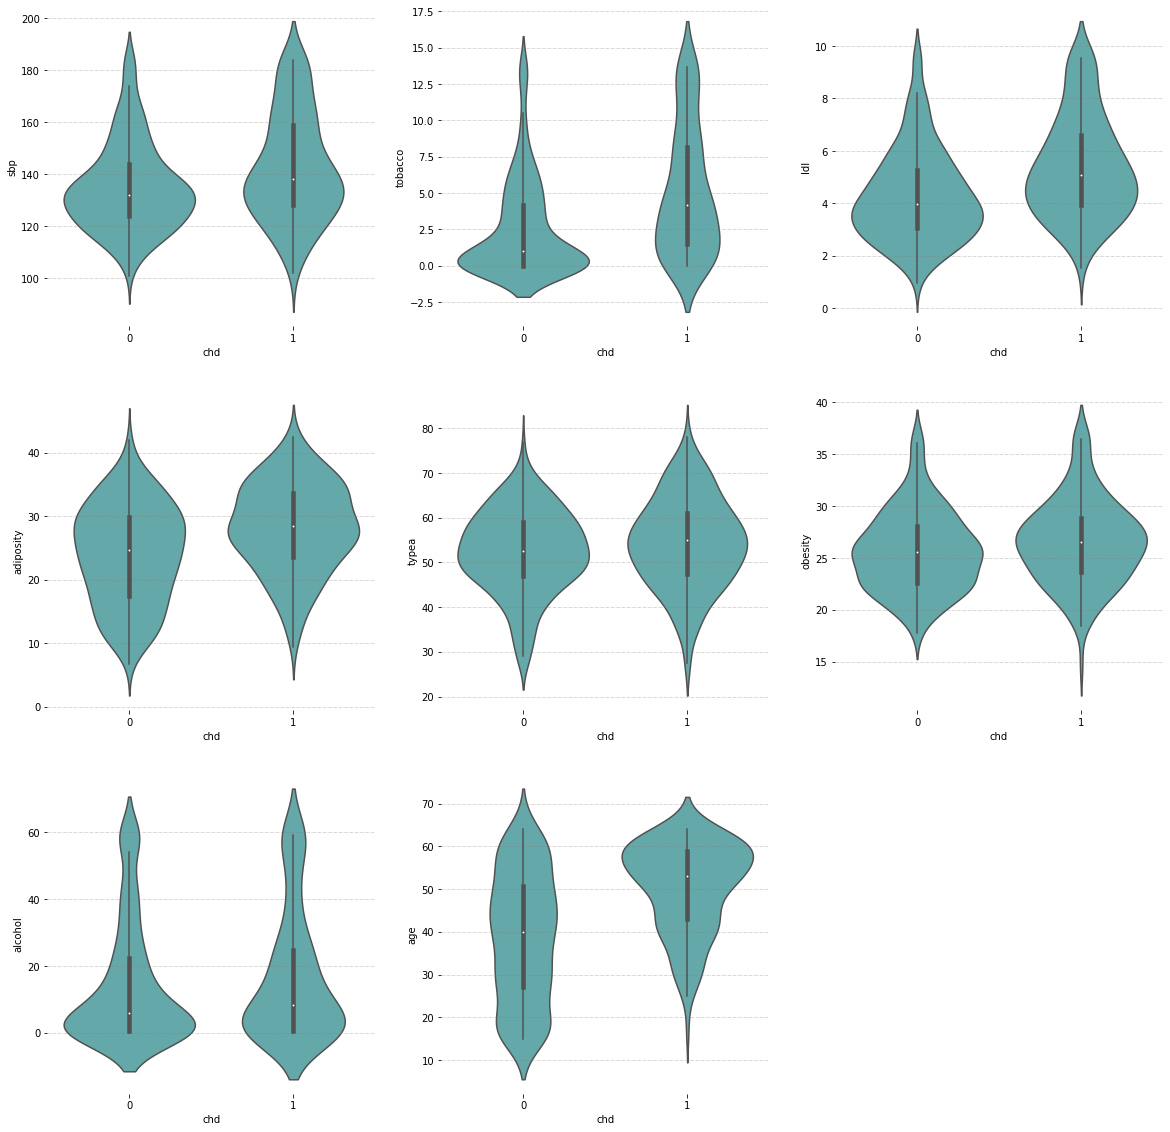

In [6]:
fig = plt.figure(figsize=(20,20))
for index, col in enumerate(numerical_features):
    ax = plt.subplot(3, 3, index+1)
    for s in ['top', 'bottom', 'left', 'right']:
        ax.spines[s].set_visible(False)
        ax.grid(b = True, color ='grey', linestyle ='-.', linewidth = 0.5, alpha = 0.6)
    sns.violinplot(x='chd', y=col, data=df, color='#5ab3b4')

In [7]:
from scipy.stats import ttest_ind

# define function for computing mean of column for 0 and 1 cases,
def test_means(data, col):
    disease = data["chd"] == 1
    values_disease = data[col][disease]
    values_no_disease = data[col][~disease]
    mean_disease = values_disease.mean()
    
    mean_no_disease = values_no_disease.mean()
    
    
    return [col, mean_disease, mean_no_disease]

test_df = pd.DataFrame(columns=["column", "mean disease","mean no disease"])

for index, col in enumerate(numerical_features):
    test_df.loc[index] = test_means(df, col)
    
test_df

column  mean disease  mean no disease
0        sbp    142.767296       135.175497
1    tobacco      5.115951         2.564627
2        ldl      5.403278         4.312438
3  adiposity     28.219623        23.969106
4      typea     54.418239        52.428808
5    obesity     26.564159        25.683262
6    alcohol     16.752830        14.297219
7        age     50.484277        38.854305

##### 2. Relationship between numerical features 

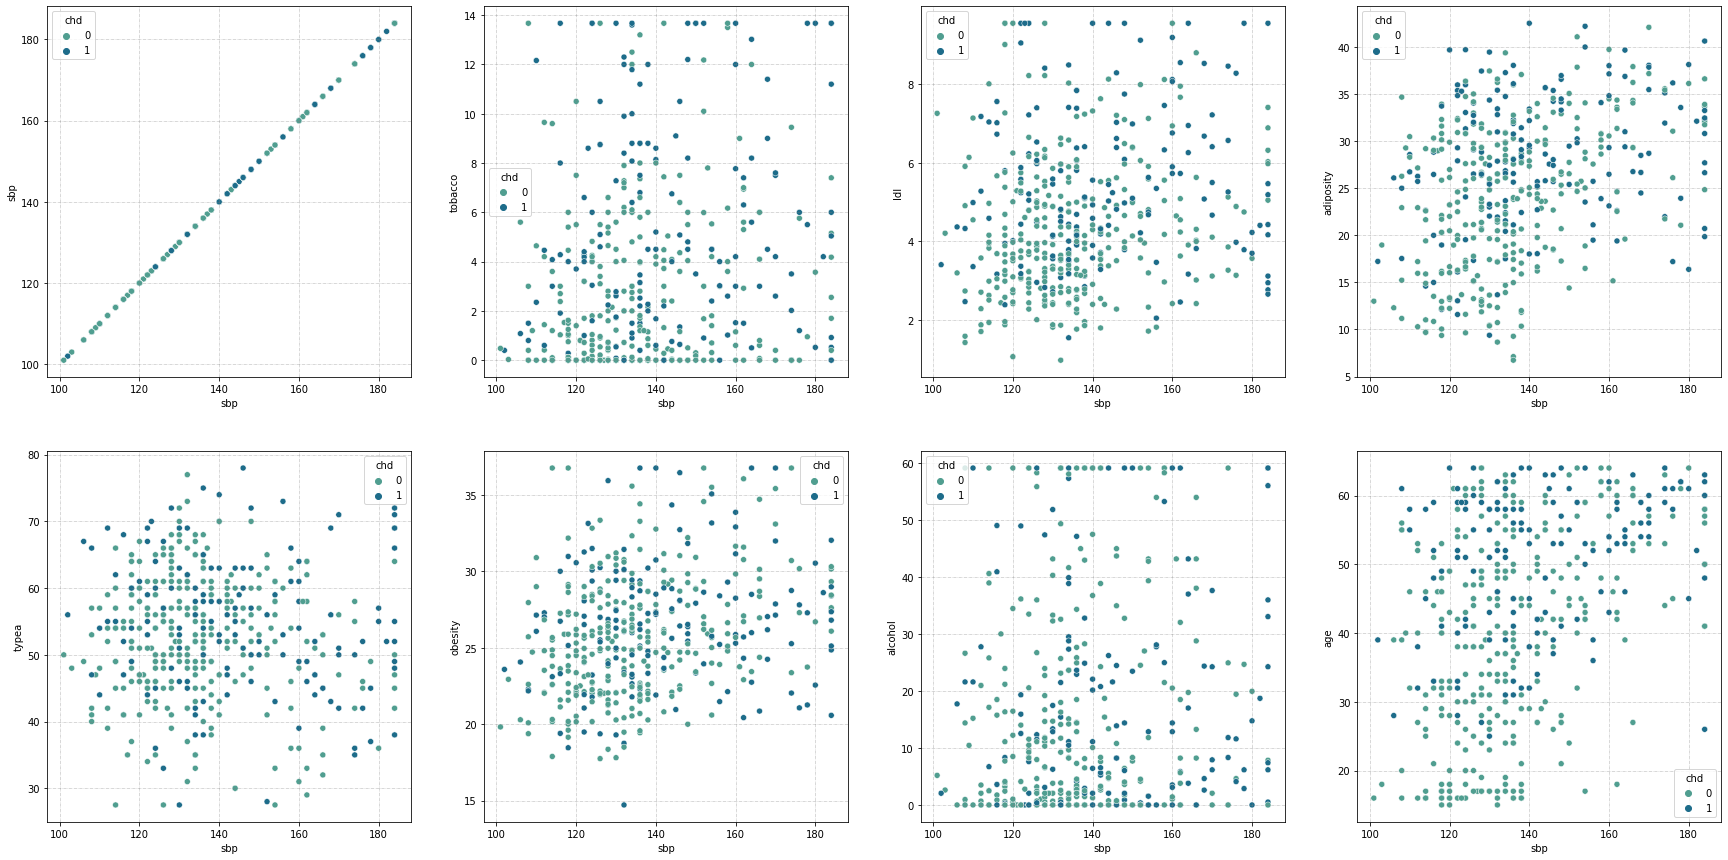

In [8]:
#spb
fig = plt.figure(figsize=(30,15))
for index, col in enumerate(numerical_features):
    ax = plt.subplot(2, 4, index+1)
    ax.grid(b = True, color ='grey', linestyle ='-.', linewidth = 0.5, alpha = 0.6)
    sns.scatterplot(x='sbp', y=col, hue='chd', data=df, palette='crest')

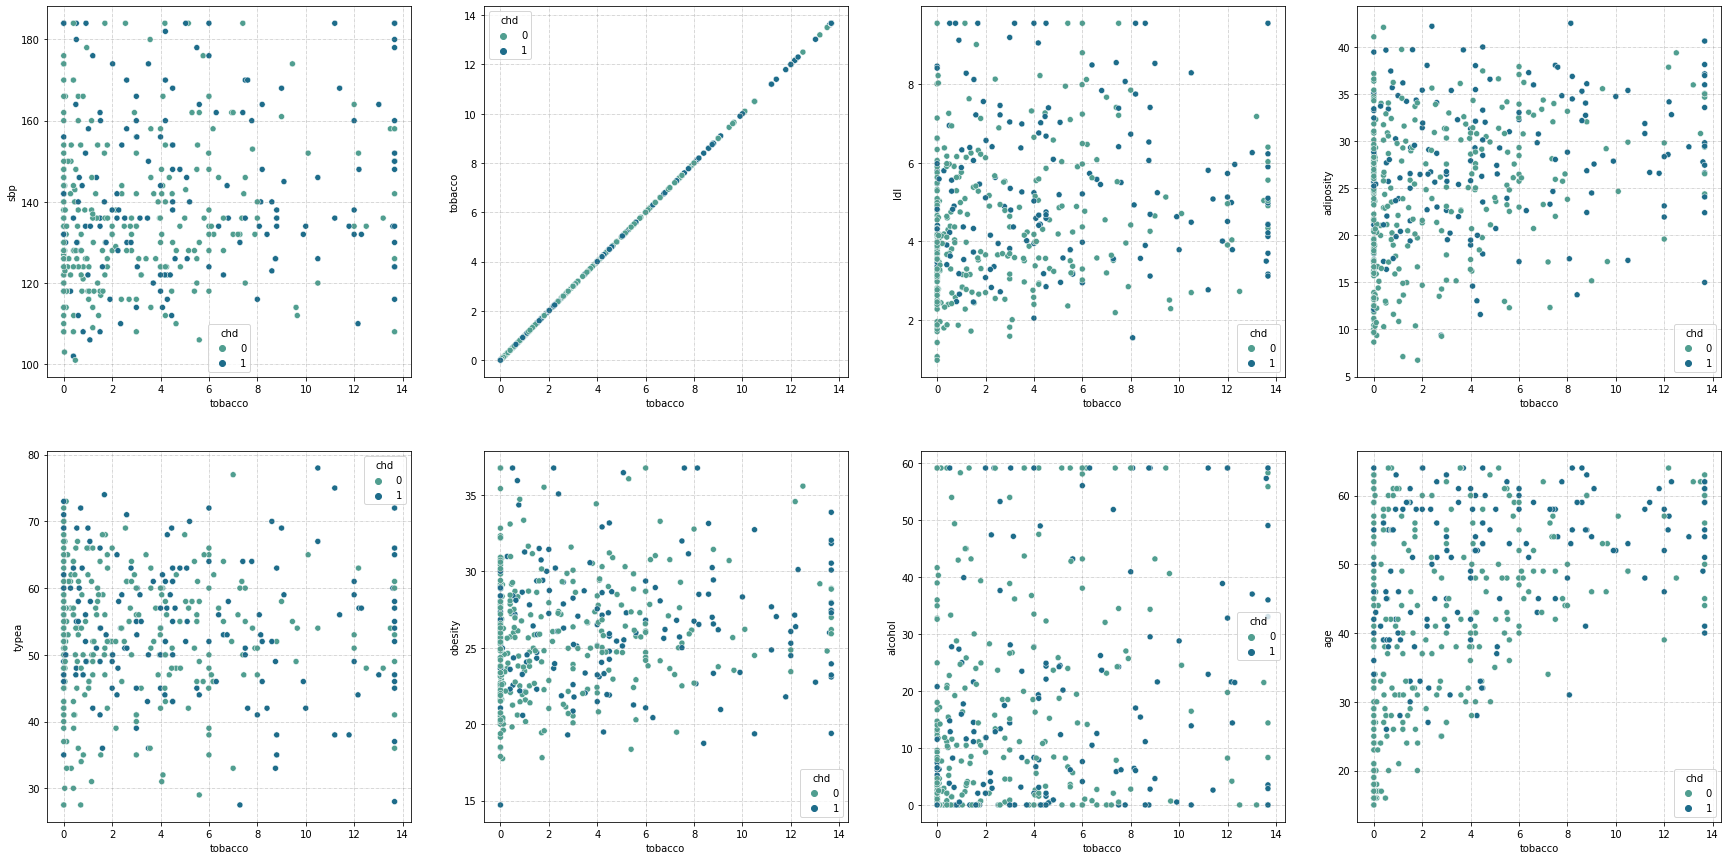

In [9]:
#tobacco
fig = plt.figure(figsize=(30,15))
for index, col in enumerate(numerical_features):
    ax = plt.subplot(2, 4, index+1)
    ax.grid(b = True, color ='grey', linestyle ='-.', linewidth = 0.5, alpha = 0.6)
    sns.scatterplot(x='tobacco', y=col, hue='chd', data=df, palette='crest')

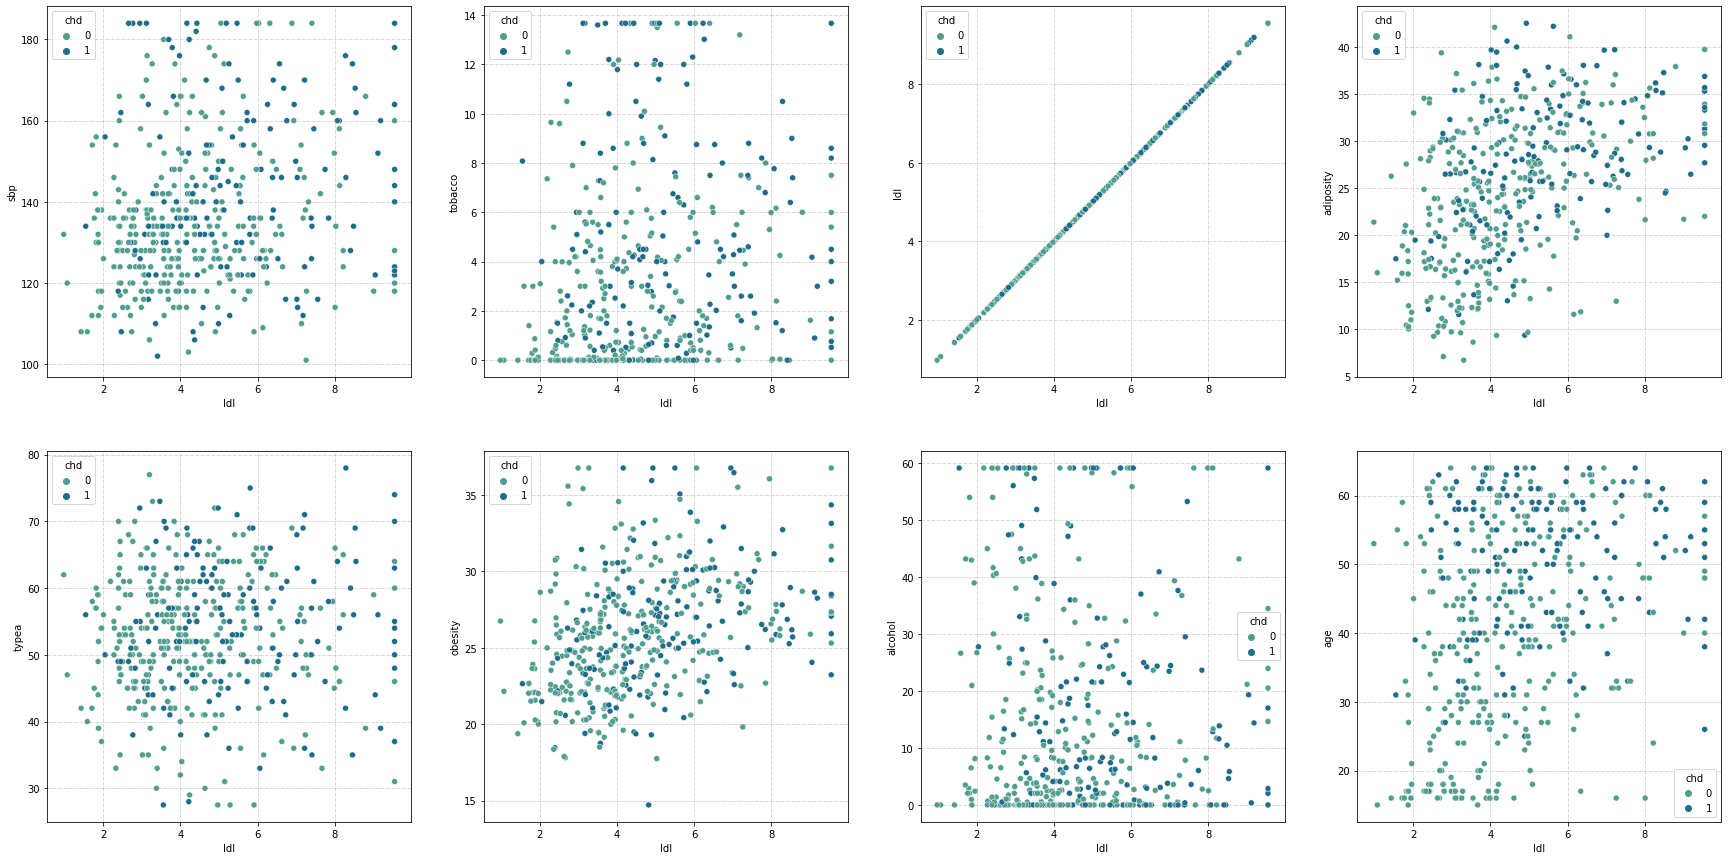

In [10]:
#ldl
fig = plt.figure(figsize=(30,15))
for index, col in enumerate(numerical_features):
    ax = plt.subplot(2, 4, index+1)
    ax.grid(b = True, color ='grey', linestyle ='-.', linewidth = 0.5, alpha = 0.6)
    sns.scatterplot(x='ldl', y=col, hue='chd', data=df, palette='crest')

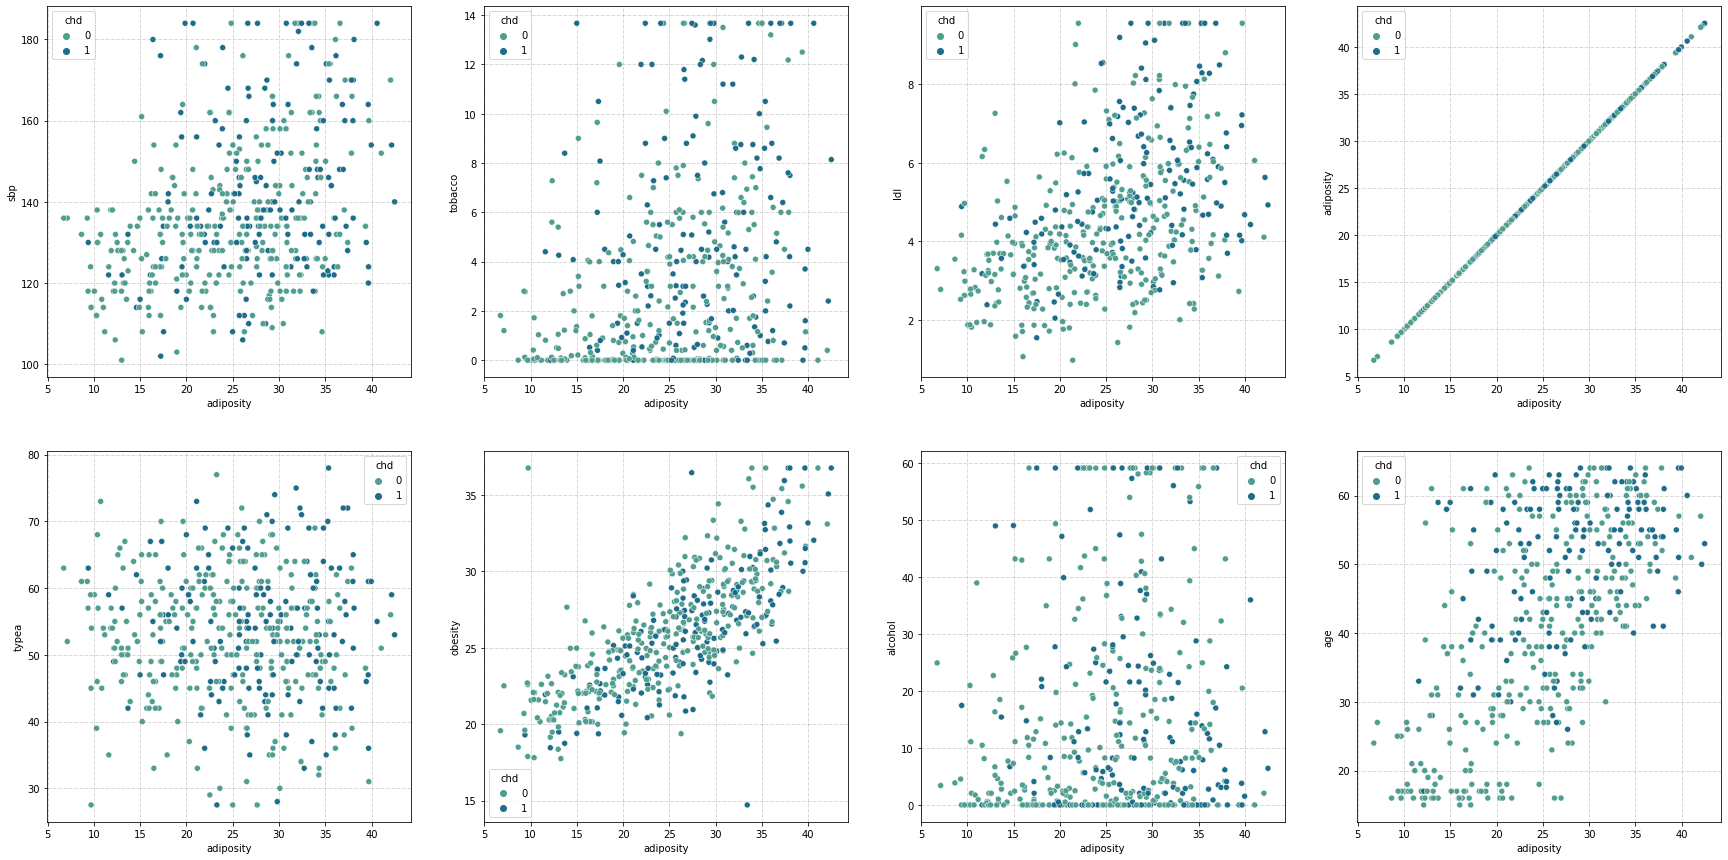

In [11]:
#adiposity 
fig = plt.figure(figsize=(30,15))
for index, col in enumerate(numerical_features):
    ax = plt.subplot(2, 4, index+1)
    ax.grid(b = True, color ='grey', linestyle ='-.', linewidth = 0.5, alpha = 0.6)
    sns.scatterplot(x='adiposity', y=col, hue='chd', data=df, palette='crest')

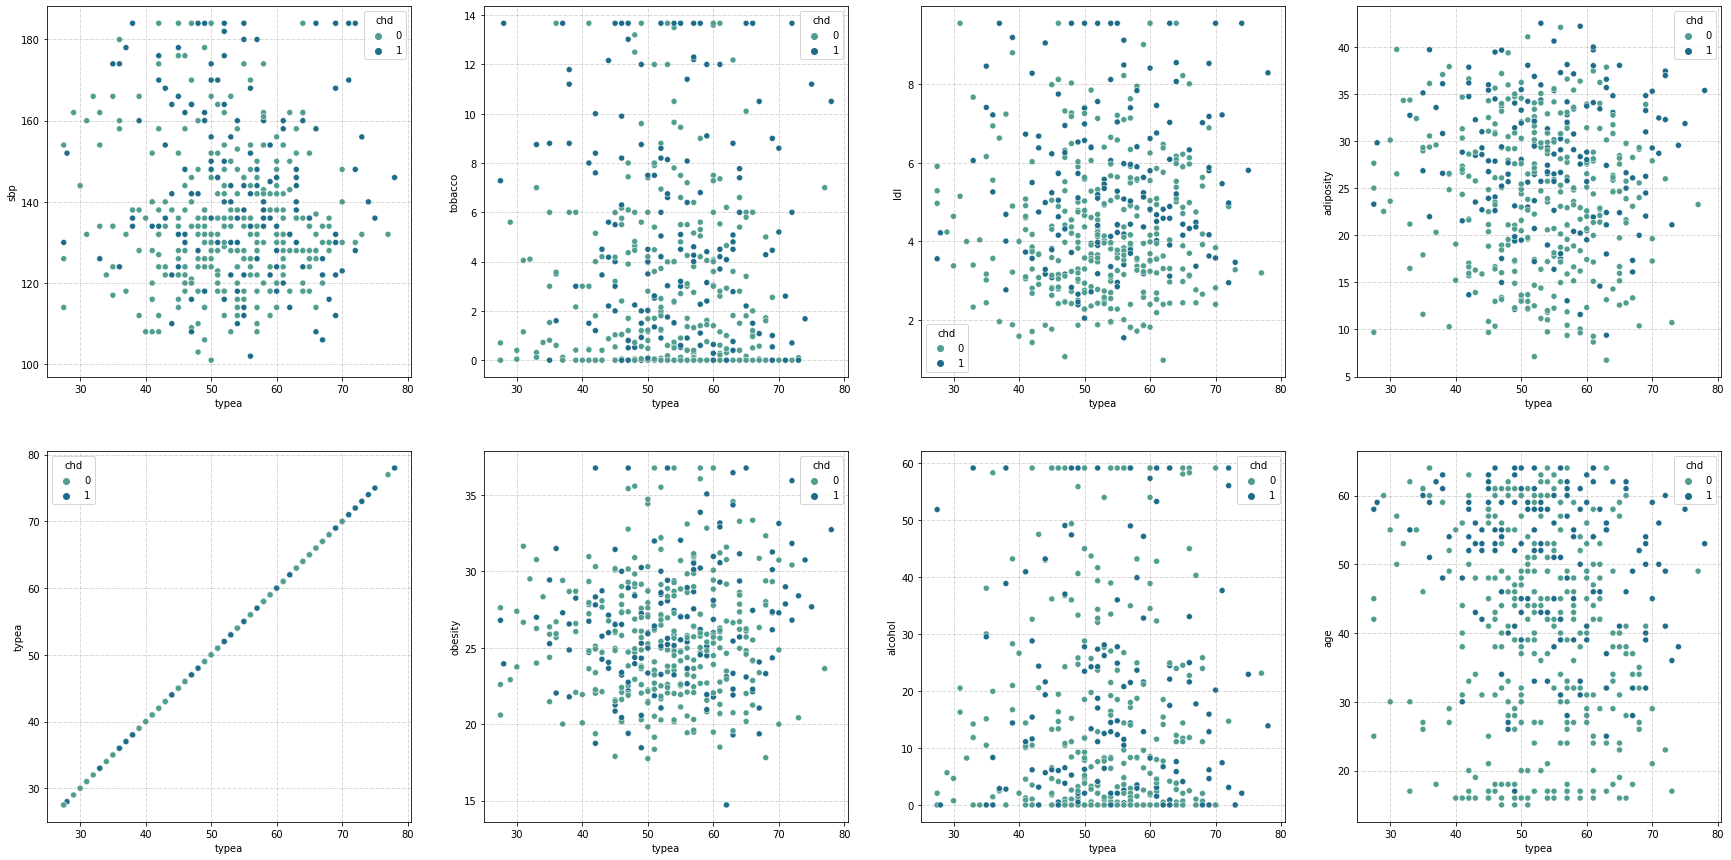

In [12]:
#typea
fig = plt.figure(figsize=(30,15))
for index, col in enumerate(numerical_features):
    ax = plt.subplot(2, 4, index+1)
    ax.grid(b = True, color ='grey', linestyle ='-.', linewidth = 0.5, alpha = 0.6)
    sns.scatterplot(x='typea', y=col, hue='chd', data=df, palette='crest')

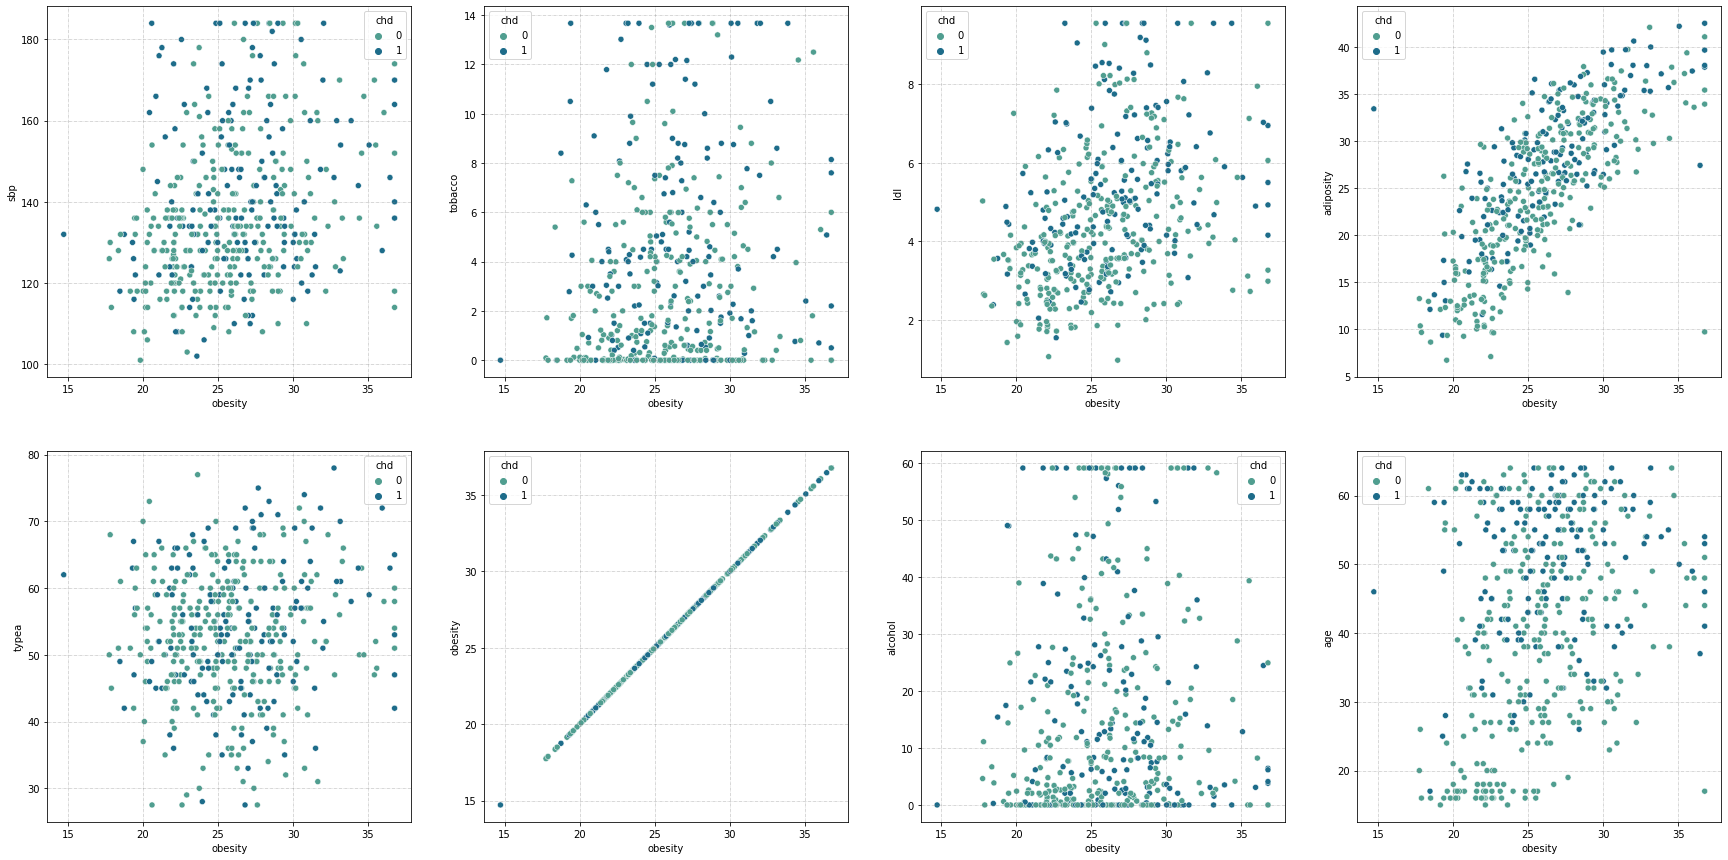

In [13]:
#Obesity
fig = plt.figure(figsize=(30,15))
for index, col in enumerate(numerical_features):
    ax = plt.subplot(2, 4, index+1)
    ax.grid(b = True, color ='grey', linestyle ='-.', linewidth = 0.5, alpha = 0.6)
    sns.scatterplot(x='obesity', y=col, hue='chd', data=df, palette='crest')

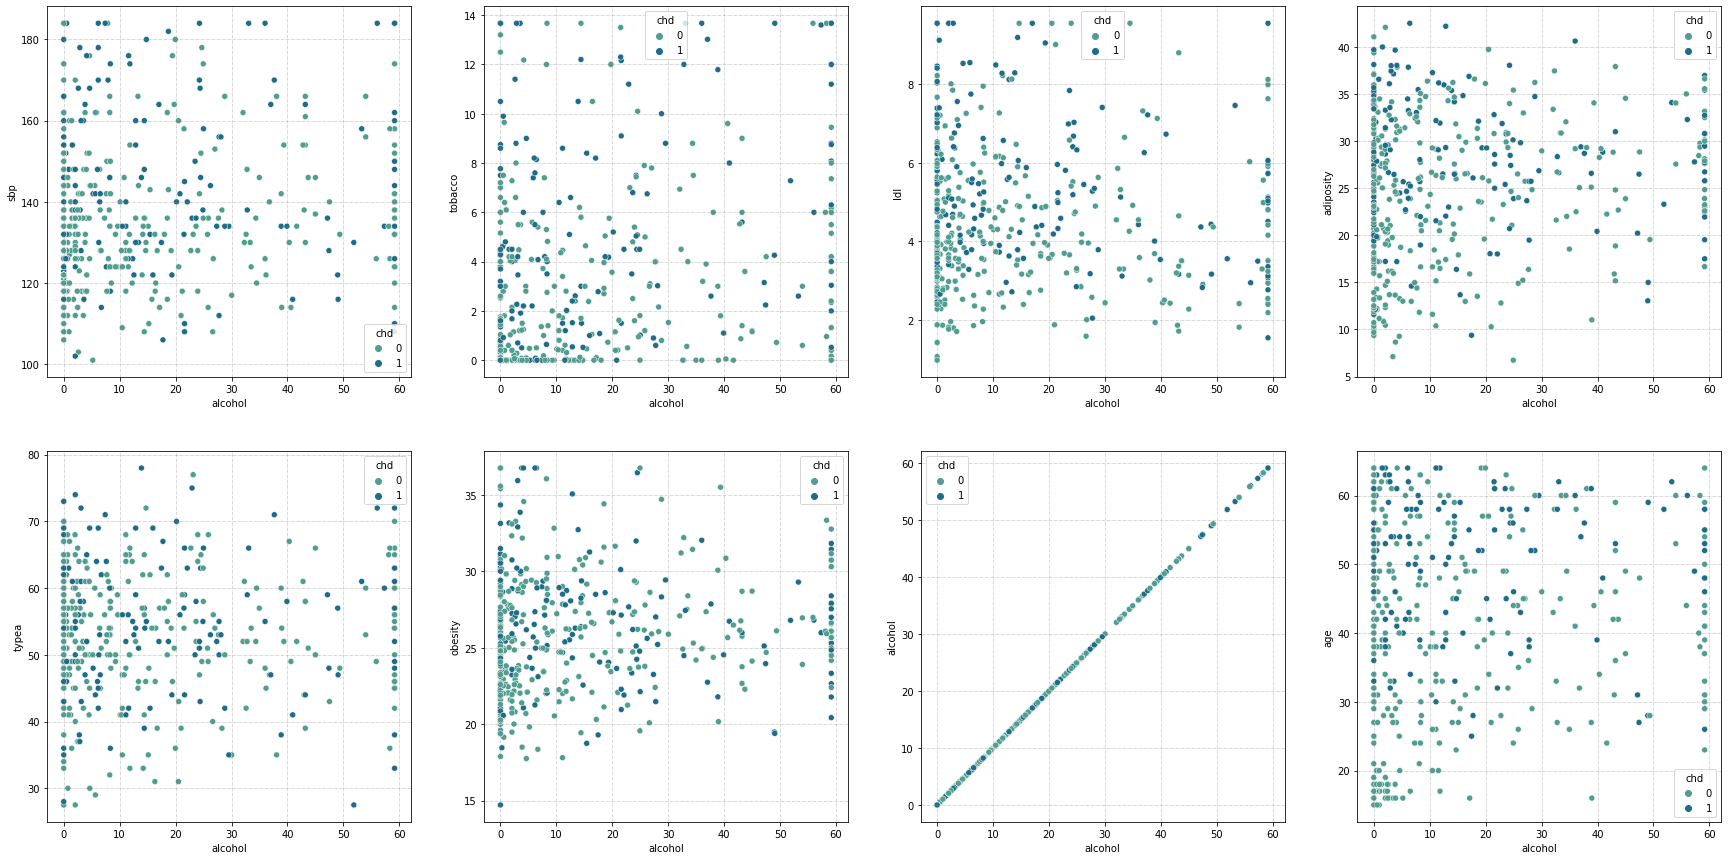

In [14]:
#alcohol
fig = plt.figure(figsize=(30,15))
for index, col in enumerate(numerical_features):
    ax = plt.subplot(2, 4, index+1)
    ax.grid(b = True, color ='grey', linestyle ='-.', linewidth = 0.5, alpha = 0.6)
    sns.scatterplot(x='alcohol', y=col, hue='chd', data=df, palette='crest')

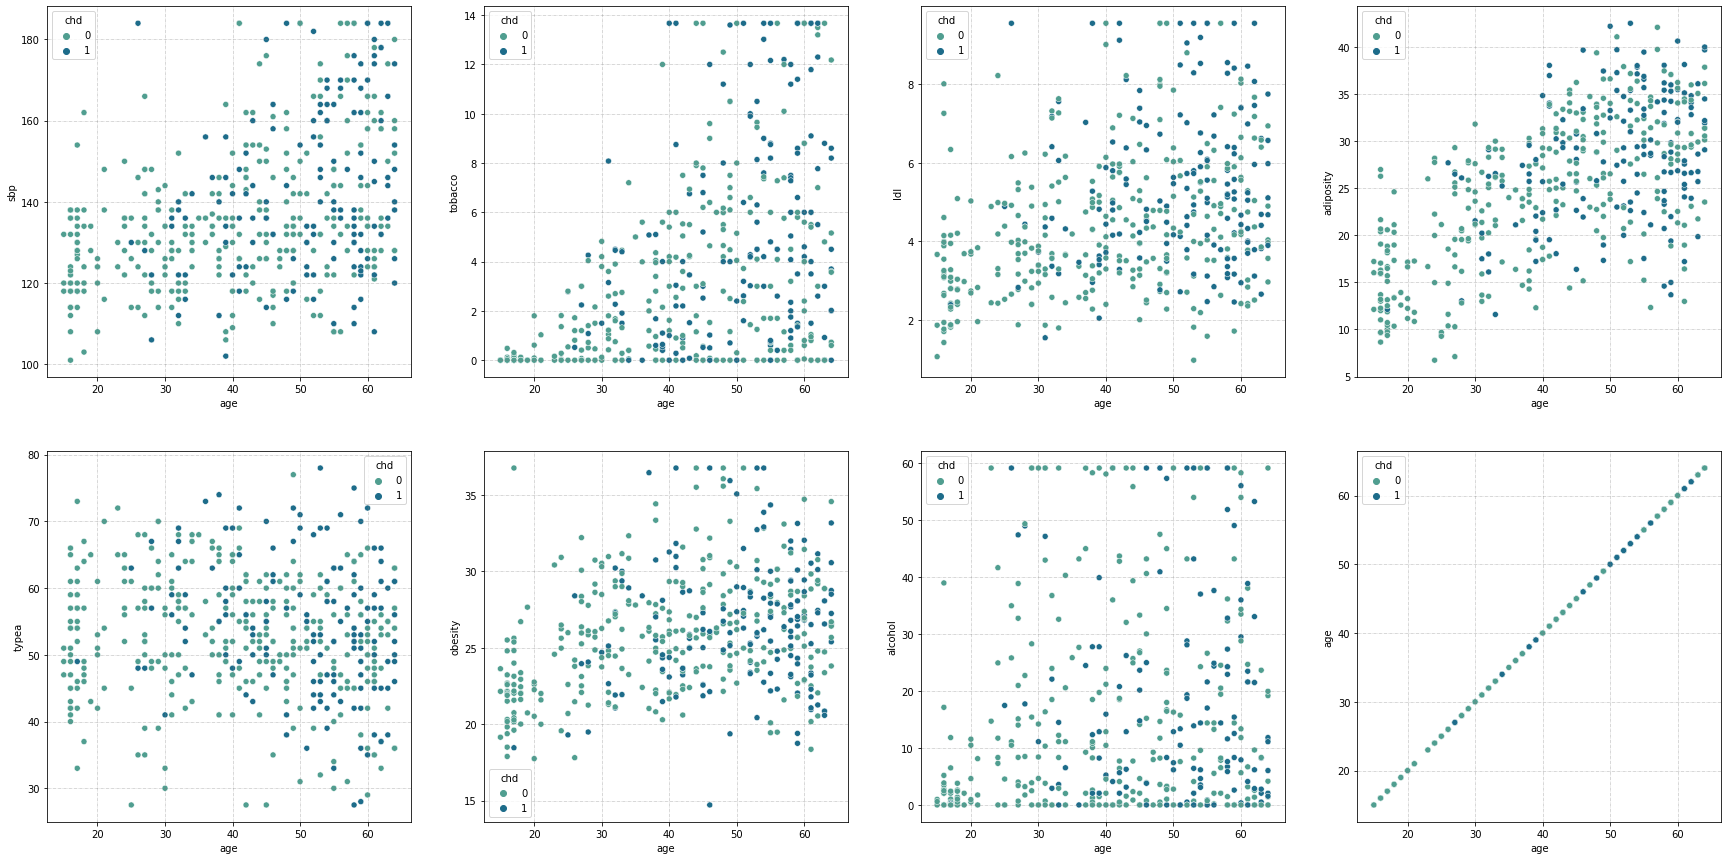

In [15]:
#age
fig = plt.figure(figsize=(30,15))
for index, col in enumerate(numerical_features):
    ax = plt.subplot(2, 4, index+1)
    ax.grid(b = True, color ='grey', linestyle ='-.', linewidth = 0.5, alpha = 0.6)
    sns.scatterplot(x='age', y=col, hue='chd', data=df, palette='crest')

###### Correlation Coefficients

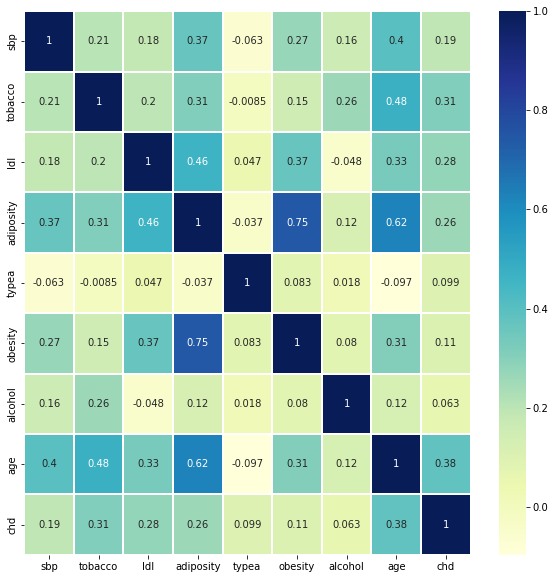

In [16]:
dfcorr = df.corr()
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(dfcorr, annot=True,linewidths=0.3,cmap="YlGnBu")
plt.show()

In [17]:
df.corr()["chd"]

sbp          0.193353
tobacco      0.310341
ldl          0.276286
adiposity    0.260474
typea        0.098616
obesity      0.105491
alcohol      0.063105
age          0.379416
chd          1.000000
Name: chd, dtype: float64

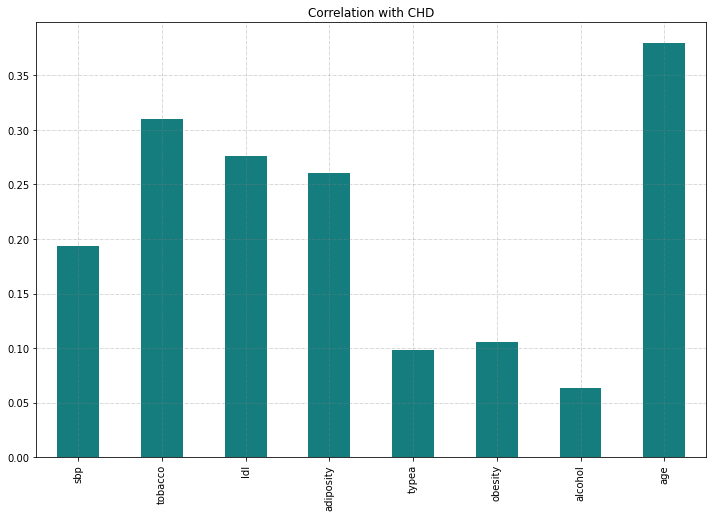

In [18]:
df.drop('chd', axis=1).corrwith(df.chd).plot(kind='bar', 
                                             figsize=(12, 8),title="Correlation with CHD",color="#167D7F")
plt.grid(b = True, color ='grey', linestyle ='-.', linewidth = 0.5, alpha = 0.6)

##### 2. Relationship Between Categorical Variables

In [19]:
cross_table = pd.crosstab(df.chd , df.famhist)
cross_table

famhist  Absent  Present
chd                     
0           206       96
1            63       96

In [20]:
results = chi2_contingency(cross_table)
print('The P-Value of the ChiSq Test is:', results[1])

The P-Value of the ChiSq Test is: 5.907439103427825e-09
